In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### Informazione sulla cartella:

Tutti i risultati degli esercizi sono i file con estensione '.out' o '.o'.

Per generare nuovamente i file dei risultati basta usare il comando 'make' da terminale per compilare ed eseguire i codici. I file verrano generati automaticamente nella cartella corretta così che è sufficiente eseguire nuovamente il notebook per visualizzarli.

## 8.1 ed 8.2

Il Variational Monte Carlo è una tecnica che permette di ottenere un'approssimazione dell'energia e della funzione d'onda del ground state di un sistema many-body ottimizzando una famiglia di funzioni d'onda $\{ \Psi_T(x) \}$ rispetto a i parametri che definiscono la famiglia per ottenere la minima energia:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \, .
$$

Tale metodo è stato applicato ad una singola particella sottoposta ad un potenziale unidimensionale $V(x) = x^4 - \frac{5}{2}x^2$ utilizzando come funzione d'onda  $ \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}$, la quale ha la medesima simmetria del potenziale e quindi della vera funzione d'onda del ground state. Per stimare l'integrale viene campionata tramite l'algoritmo di Metropolis la seguente distribuzione di probabilià $\frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}$.

Dopo aver implementato il Variational Monte Carlo è stata calcolata l'energia mediando le $M=10^4$ stime dell'integrale eseguito con $L=10^3$ campionamenti al variare dei parametri della funzione d'onda: $\mu \in [0.75, 0.85)$ e $\sigma \in [0.6, 0.7)$ con passi  $ \Delta \mu = 0.025$ e $ \Delta \sigma = 0.0125$ rispettivamente.

Nel grafico sottostante è riportato il valore di energia in funzione dei parametri, dal quale sono stati ricavati quelli che la minimizzano: $\mu=0.8$ e $\sigma=0.6125$.

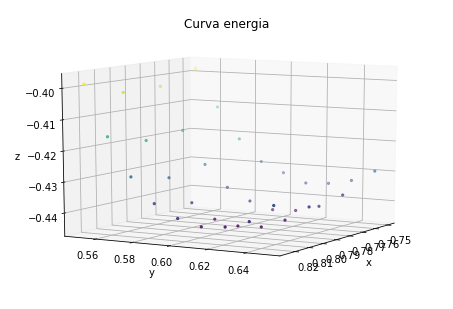

Parametri che minimizzano enegia
energia: -0.444236
mu: 0.8
sigma: 0.6125


In [6]:
mu, sigma, energia = np.loadtxt("OptimizationParameters.out", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mu, sigma, energia, c=energia, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title('Curva energia')
plt.show()

print('Parametri che minimizzano enegia')
print('energia:',np.min(energia))
i=np.argmin(energia)
print('mu:',mu[i])
print('sigma:',sigma[i])

Dopo aver scartato $10^3$ campionamenti di equlibrazione, è stato effettuato il data blocking, con $N=100$ blocchi, sulle $M=10^4$ energie variazionali del ground, ottenute con parametri che minimizzano l'energia, utilizzando $L=10^3$ campionamenti. L'energia media, con annessa deviazione standard della media, in funzione del numero di blocchi utilizzati è mostrati nel grafico "Energia del ground state" da cui si evince che la migliore stima per l'energia risulta $E= -0.4443 \pm 0.0002$.

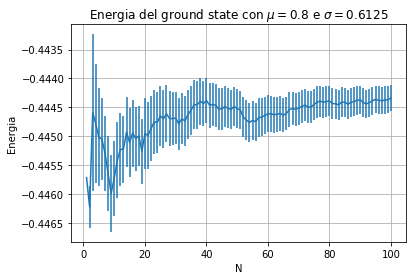

In [4]:
x, y, error = np.loadtxt("IntegraliOttimizzati.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x/100,y, yerr=error)

plt.xlabel('N')
plt.ylabel(r'Energia')
plt.title('Energia del ground state con $\mu=0.8$ e $\sigma=0.6125$')
plt.grid(True)


plt.show()

Utilizzando i $10^3$ punti campionati durante ognuna delle $10^4$ iterazioni è stato realizzato un istorgamma contando il numero dei punti, compresi tra due estrmi simmetrici $ \pm 3$, che cado in ognuno dei $200$ bin di ampiezza $dr=\frac{6}{200}$. Poichè si vuole che l'indice del bin in cui cade il campionamento sia maggiore o uguale a $0$ si trasla il campionamento $x$ di $3$  e si utilizza la parte intera di $i$ - $i=\frac{ x+3}{dr}$ - come indice. I $10^4$ istogrammi ottenuti sono stati analizzati con il metodo del data blocking dividendo i bins in $100$ blocchi da $100$ dati ciascuno. Nel grafico "Potenziale e probabilità del ground state" è riportato l'istogramma ottenuto dalle medie con $100$ blocchi con la rispettiva deviazione standard della media, sovrapposto alla soluzione ottenuta discretizzando la funzione d'onda che risolve l'equazione di Schroedinger.
Si può osservare che l'energia ottenuta con il metodo variazionale risulta maggiore e non compatibile entro l'errore con quella ottenuta con l'altro metodo e di conseguenza anche le funzioni d'onda non sono compatibile entro l'errore associato.


In [16]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)



Autovalore energia del ground state:  -0.460465879692715
Energia del ground state variazionale :  -0.444339  +/- 0.000231934


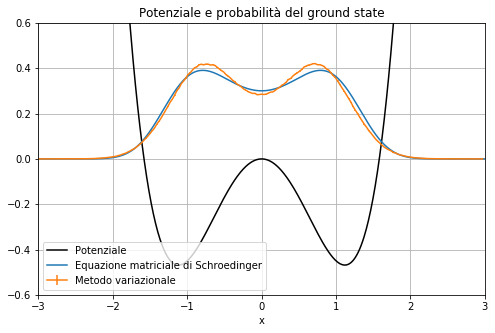

In [17]:
print("Autovalore energia del ground state: ", E[0])
print("Energia del ground state variazionale : ", y[len(y)-1], " +/-", error[len(y)-1] )

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potenziale") # plot the potential
plt.plot(x,(psi[0])**2, label='Equazione matriciale di Schroedinger')

#Risultati ottenuti con il metodo variazionale
x_var, y_var, error_var = np.loadtxt("Configurazioni.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_var,y_var, yerr=error_var, label='Metodo variazionale')

plt.title("Potenziale e probabilità del ground state")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()

plt.show()

## 8.3

La funzione d'onda del ground state è stata ricavata con il path integrals usando come funzione d'onda di trial
$\Psi_T=1 $ e $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$

(con gli stessi $\mu$ e $\sigma$ dell'esercizio precedente). Con tale metodo si ottengono funzioni d'onda del ground state simili e compatibili con quella che risolve l'equazione di Schroedinger in forma matriciale.

I grafici sotto riportati sono stati ottenuti adottando un imaginary time propagation $\tau=8$ ed avendo equlibrato la simulazione in modo che la probabilità di accettazione di una configurazione, sia nel path integral ground state sia nel path integral Monte Carlo, risulti $\sim 50 \%$. 

In seguito è stato verificato che per il caso $\Psi_T=1 $ci si può ridurre fino a $\tau = 3$ , mentre per $\Psi_T= \Psi_T^{\sigma,\mu}(x)$ fino a $\tau = 0.1$. Ciò conferma il fatto che, partendo da una funzione simile a quella del ground state del sistema, il path integral richiede poche proiezioni per convergere al risultato corretto.

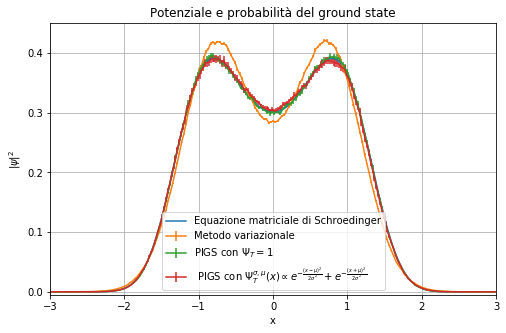

In [31]:
plt.figure(figsize=(8,5))
scale = 0.3
#schroedinger
plt.plot(x,(psi[0])**2, label='Equazione matriciale di Schroedinger')

#Risultati ottenuti con mil metodo variazionale
x_var, y_var, error_var = np.loadtxt("Configurazioni.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_var,y_var, yerr=error_var, label='Metodo variazionale')

#pigs
x_pigs_1, y_pigs_1, error_pigs_1 = np.loadtxt("probability_pigs_1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_pigs_1,y_pigs_1, yerr=error_pigs_1, label=r'PIGS con $\Psi_T =1 $')

#pigs
x_pigs_psi, y_pigs_psi, error_pigs_psi = np.loadtxt("probability_pigs_psi.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_pigs_psi,y_pigs_psi, yerr=error_pigs_psi, label=r' PIGS con $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}} $')


plt.title("Potenziale e probabilità del ground state")
plt.xlabel("x")
plt.ylabel(r'$| \psi |^2$')
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.005,0.45))
plt.legend()

plt.show()

Infine utilizzando i Path Integrals Monte Carlo è stata mostrata la variazione della funzione d'onda, ottenuta da $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ (con $\tau=8)$, quando il sistema si trova  a $T > 0 \; K$ per cui non solo il ground state può essere occupato.

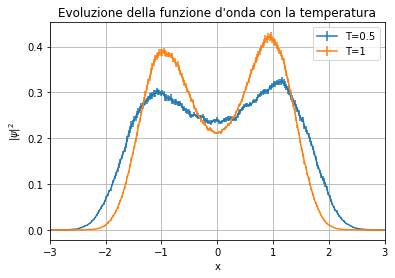

In [33]:
x_3, y_3, error_3 = np.loadtxt("probability_pigs_5T.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_3,y_3, yerr=error_3, label=r'T=0.5')

x_2, y_2, error_2 = np.loadtxt("probability_pigs_1T.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x_2,y_2, yerr=error_2, label=r'T=1')


plt.title("Evoluzione della funzione d'onda con la temperatura")
plt.xlabel("x")
plt.ylabel(r'$| \psi |^2$')
plt.grid(True)
plt.xlim((-3,3))
plt.legend()

plt.show()